# Importing libraries

In [3]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
import numpy as np

In [64]:
def PlotParameters(model):
    W = model.state_dict()['linear.weight'].data
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i<10 :
            # Set the label for the sub-plot.
            ax.set_xlabel("class: {0}".format(i))

            # Plot the image.
            ax.imshow(W[i, :].view(28, 28), vmin=w_min, vmax=w_max, cmap='seismic')

            ax.set_xticks([])
            ax.set_yticks([])
    plt.show()

In [32]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y= ' + str(data_sample[1]))

# Data prepration

In [6]:
train_dataset = dsets.MNIST(root='../resources/data', train=True, download=True, transform=transforms.ToTensor())
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../resources/data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
validation_dataset = dsets.MNIST(root='../resources/data', train=False, download=True, transform=transforms.ToTensor())
validation_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../resources/data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [16]:
print(train_dataset[0][0].type())

torch.FloatTensor


y=5
torch.Size([1, 28, 28])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


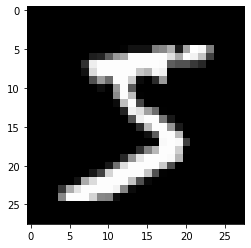

In [29]:
for sample in train_dataset:
    print("y=" + str(sample[1]))
    print(sample[0].shape)
    print(sample[0][0][1])
    print(sample[0].numpy().reshape(28, 28)[0])
    plt.imshow(sample[0].numpy().reshape(28, 28), cmap='gray')
    break

In [30]:
print("The label: ", train_dataset[3][1])

The label:  1


The image: 


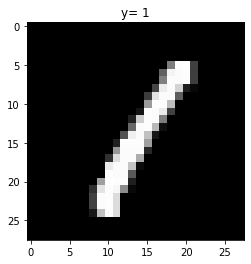

In [34]:
print("The image: ")
show_data(train_dataset[3])

# Softmax Classifier

In [35]:
class Softmax(nn.Module):
    def __init__(self, input_size, output_size):
        super(Softmax, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        return self.linear(x)

# Define Model

In [36]:
input_dim = 28 * 28
output_dim = 10

In [37]:
model = Softmax(input_dim, output_dim)
model

Softmax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [39]:
list(model.parameters())[0].size()

torch.Size([10, 784])

In [41]:
list(model.parameters())[1].size()

torch.Size([10])

In [42]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0119, -0.0003, -0.0314,  ...,  0.0340, -0.0316, -0.0289],
                      [ 0.0252,  0.0232,  0.0219,  ...,  0.0274, -0.0020, -0.0139],
                      [ 0.0335,  0.0226,  0.0147,  ...,  0.0168,  0.0044, -0.0099],
                      ...,
                      [-0.0250, -0.0032,  0.0223,  ..., -0.0247, -0.0134, -0.0208],
                      [-0.0114, -0.0209,  0.0354,  ..., -0.0088, -0.0029, -0.0329],
                      [ 0.0312,  0.0079, -0.0282,  ..., -0.0050, -0.0083,  0.0073]])),
             ('linear.bias',
              tensor([-0.0168, -0.0233, -0.0081, -0.0331,  0.0330, -0.0208, -0.0357,  0.0275,
                       0.0283, -0.0285]))])

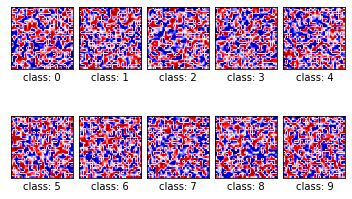

In [45]:
PlotParameters(model)

# Training

https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

In [47]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=128)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

In [54]:
 for x, y in train_loader:
            print(x[0][0][0])
            print(x.shape)
            print(x.view(-1, 28 * 28)[0][0])
            print(x.view(-1, 28 * 28).shape)
            break

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])
torch.Size([128, 1, 28, 28])
tensor(0.)
torch.Size([128, 784])


In [58]:
LOSS = []
accuracies = []

def train_model(epochs):
    for epoch in range(epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
        
        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y).sum().item()
        accuracy = correct / len(validation_dataset)
        LOSS.append(loss.data)
        accuracies.append(accuracy)

In [59]:
train_model(10)

# Analyze Results

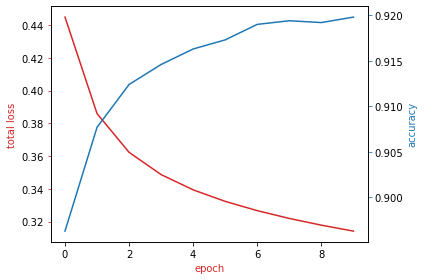

In [62]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(LOSS,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracies, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

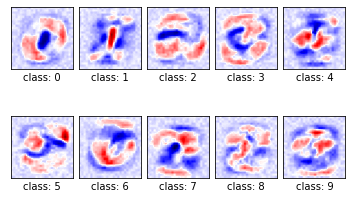

In [65]:
PlotParameters(model)

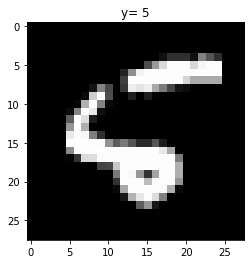

yhat: tensor([6])
probability of class  0.987329363822937


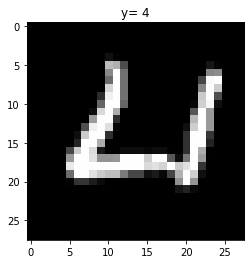

yhat: tensor([6])
probability of class  0.425438791513443


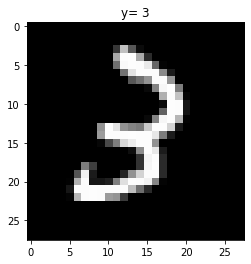

yhat: tensor([2])
probability of class  0.6521068811416626


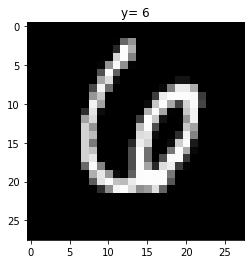

yhat: tensor([7])
probability of class  0.33000341057777405


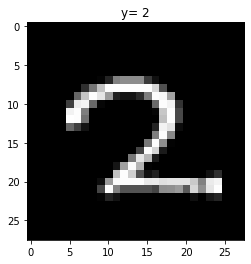

yhat: tensor([7])
probability of class  0.6070876121520996


In [66]:
# 5 misslabeled examples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break

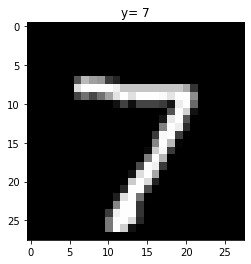

yhat: tensor([7])
probability of class  0.9964579939842224


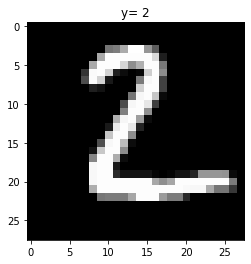

yhat: tensor([2])
probability of class  0.938685417175293


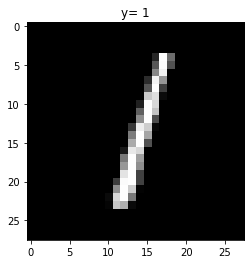

yhat: tensor([1])
probability of class  0.9733904600143433


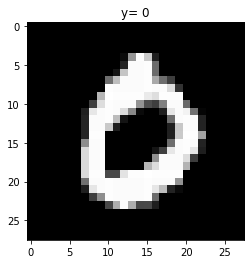

yhat: tensor([0])
probability of class  0.9995126724243164


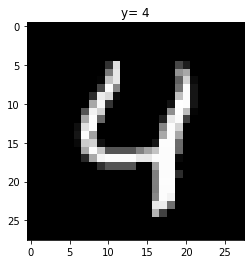

yhat: tensor([4])
probability of class  0.9412357211112976


In [67]:
# 5 correctly examples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat == y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break  